In [2]:
import pylab
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf
import wave
import sys
from scipy import signal
import librosa , librosa.display
from scipy.io.wavfile import read

In [3]:
plt.rcParams["figure.figsize"] = [7.5, 3.5]
plt.rcParams["figure.autolayout"] = True

In [4]:
input = read("sound.wav")
audio = input[1].astype(np.int64)

fs = 16e3
n_samples = len(audio)
duration = n_samples / fs
print('so mau', n_samples)
print('thoi gian', duration)

so mau 67244
thoi gian 4.20275


In [5]:
t_stamps = [i/fs for i in range(n_samples)]

window size 0.02
window samples 320


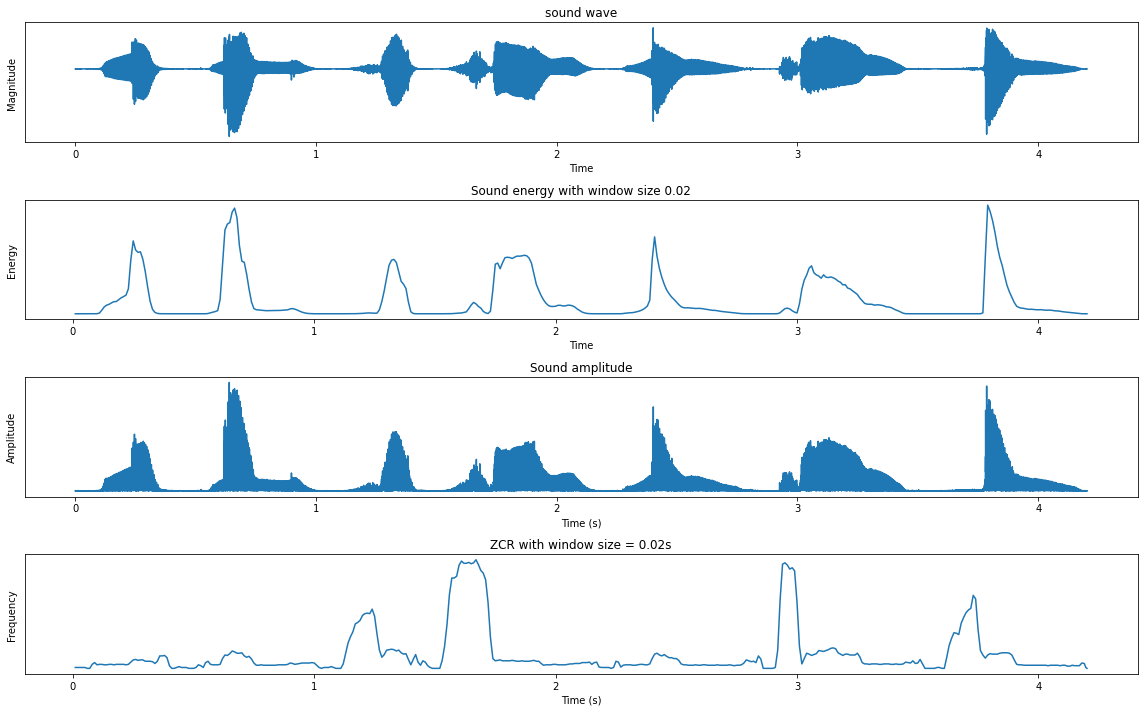

In [9]:
fig, axes = plt.subplots(4, 1, figsize=(16, 10))

# draw signal with respect time
plt.subplot(411)
axes[0].set_title('sound wave')
plt.ylabel('Magnitude')
plt.xlabel('Time')
plt.yticks([-20000, 20000])
plt.yticks([])
plt.plot(t_stamps, audio)

# draw signal energy with window size 20ms
plt.subplot(412)
window_size = 20 / 1000
window_n_samples = int(window_size * fs)
print('window size', window_size)
print('window samples', window_n_samples)
w_arr = []
t_arr = []
for i in range(0, n_samples, window_n_samples // 2):
    start_index = i
    end_index = (i + window_n_samples) if (i + window_n_samples) <= n_samples else n_samples
    t_arr.append(t_stamps[(start_index + end_index) // 2])
    w_arr.append(sum([(audio[j]*audio[j]) for j in range(start_index, end_index)]))

plt.title('Sound energy with window size {}'.format(window_size))
plt.xlabel('Time')
plt.ylabel('Energy')
plt.yticks([])
plt.plot(t_arr, w_arr)

# Draw signal amplitude
plt.subplot(413)
plt.title('Sound amplitude')
plt.plot(t_stamps, [s if s >= 0 else -s for s in audio])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.yticks([])

# Draw ZCR
plt.subplot(414)
zcr_arr = []
t_arr = []
for i in range(0, n_samples, window_n_samples // 2):
    start_index = i
    end_index = (i + window_n_samples) if i + window_n_samples <= n_samples else n_samples
    t_arr.append(t_stamps[(start_index + end_index) // 2])
    zcr_arr.append(np.sum(np.array([audio[j] * audio[j + 1] < 0 for j in range(start_index, end_index - 1)])))

plt.title('ZCR with window size = {}s'.format(window_size))
plt.plot(t_arr, zcr_arr)
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.yticks([])

plt.tight_layout()
plt.savefig('ketqua.png', dpi=400)
plt.show()